In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
def one_step_lookahead(s, V, rewards, p_h, discount_factor):
    A = np.zeros(101)
    # stakes مقادیر ممکن برای شرط بندی
    stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
    for a in stakes:
        # برای هر شرط ممکن مقدار ارزش وضعیت را محاسبه میکنیم
        A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h) * (rewards[s-a] + V[s-a]*discount_factor)
    return A

def value_iteration_for_gamblers(p_h, theta=0.001, discount_factor=1.0):
    # p_h احتمال برد
    # theta حداقل تغییر در وضعیت
    # discount_factor فاکتور تخفیف
    # در همه وضعیت ها مقدار پاداش صفر است بجز وقتی که برنده شویم
    rewards = np.zeros(101)
    rewards[100] = 1 
    # V مقدار ارزش وضعیت ها
    V = np.zeros(101)
    
    while True:
        delta = 0
        # delta بیشترین تغییر در وضعیت ها
        for s in range(1, 100):
            A = one_step_lookahead(s, V, rewards, p_h, discount_factor)
            # برای هر وضعیت بهترین شرط ممکن را انتخاب میکنیم
            best_action_value = np.max(A)
            # بیشترین تغییر در وضعیت ها را محاسبه میکنیم
            delta = max(delta, np.abs(best_action_value - V[s]))
            # بهترین شرط ممکن را به عنوان ارزش وضعیت ذخیره میکنیم
            V[s] = best_action_value     
        #اگر به همگرایی رسیدیم   
        if delta < theta:
            break
    
    policy = np.zeros(100)
    # برای هر وضعیت بهترین شرط ممکن را انتخاب میکنیم
    for s in range(1, 100):
        A = one_step_lookahead(s, V, rewards, p_h, discount_factor)
        best_action = np.argmax(A)
        policy[s] = best_action
    
    return policy, V


In [3]:
def policy_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    rewards = np.zeros(101)
    rewards[100] = 1 
    V = np.zeros(101)
    policy = np.zeros(100)
    
    while True:
        while True:
            delta = 0
            for s in range(1, 100):
                A = one_step_lookahead(s, V, rewards, p_h, discount_factor)
                best_action_value = np.max(A)
                delta = max(delta, np.abs(best_action_value - V[s]))
                V[s] = best_action_value        
            if delta < theta:
                break

        policy_stable = True
        for s in range(1, 100):
            chosen_a = policy[s]
            action_values = one_step_lookahead(s, V, rewards, p_h, discount_factor)
            best_a = np.argmax(action_values)
            
            if chosen_a != best_a:
                policy_stable = False
            policy[s] = best_a
        if policy_stable:
            return policy, V

In [4]:
policy, v = value_iteration_for_gamblers(0.25)

/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

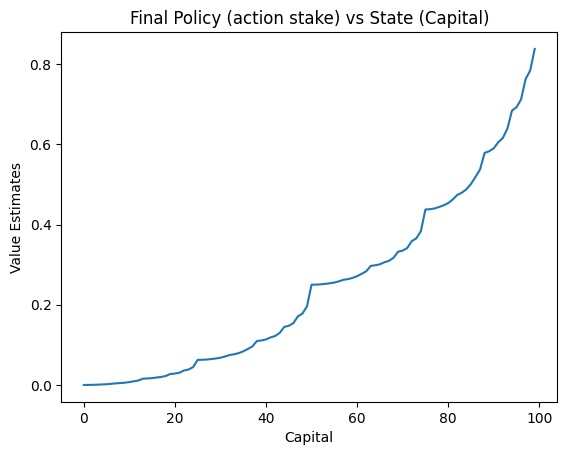

In [5]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')
 
# function to show the plot
plt.show()

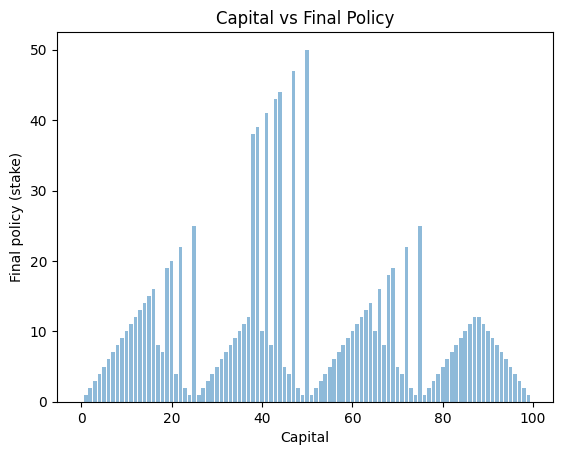

In [6]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()

In [7]:
policy, V= policy_iteration_for_gamblers(0.25)

/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

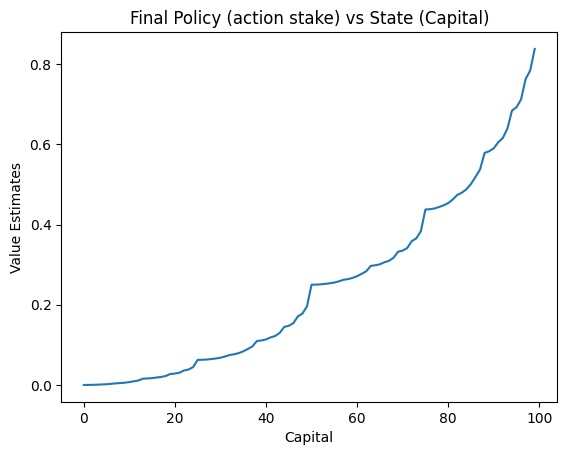

In [8]:
# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')
 
# function to show the plot
plt.show()

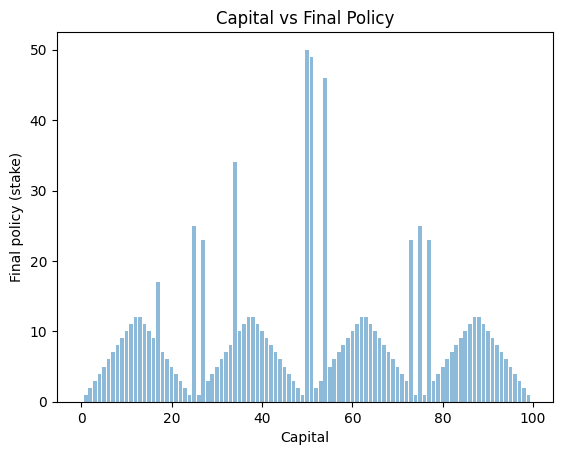

In [9]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()